!pip install serpapi google-search-results

In [13]:
import os
import random
from random import randint
from serpapi import GoogleSearch
import requests
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
def get_json_data(image_reference):
    image_url = image_reference
    params = {
      "api_key": "4b3e1f1388b1d520a42877ae6f1d992c34f9fec653c8adb226eedf7f02020070",
      "engine": "google_lens",
      "url": image_url,
      "hl": "id",
      "country": "id"
    }
    
    search = GoogleSearch(params)
    results = search.get_dict()
    return results

In [3]:
def generate_link_list(data_dict):
    
    image_list = []
    for items in data_dict['visual_matches']:
        image_list.append(items['thumbnail'])
    
    #remove duplicates
    return list(set(image_list))

In [4]:
def download_file(data_dir, image_list):

    for i, url in enumerate(image_list):
        try:
            response = requests.get(url)
            with open(f'{data_dir + str(i)}.jpg', 'wb') as file:
                file.write(response.content)
        except Exception as e: 
            print(e)

**Main Function**

In [5]:
def prepare_image(url_list, data_dir):

    print('Parsing data, this will take a while..')
    link_list = []
    for url in url_list:
        #get json data through API
        data_dict = get_json_data(url)
        #extract urls to images and append them into one list
        link_list.append(generate_link_list(data_dict))

    #flatten the list
    flattened_list = [item for sublist in link_list for item in sublist]
    random.shuffle(flattened_list)
    
    print(f'Total images to be downloaded: {len(flattened_list)}')

    # Print a text box and receive user input
    user_input = input("Proceed to download? This will take some time to complete.")
    # Decide whether to proceed or stop based on user input
    if user_input.lower() == "y":
        print("Downloading images...")
        #download and store images in local
        download_file(data_dir, flattened_list)
        
    elif user_input.lower() == "n":
        print("Stopping...")
    else:
        print("Invalid input. Please enter either 'y' or 'n'.")
    
    print(f'Total images downloaded successfully: {len(os.listdir(data_dir))}')
    print("You can proceed")


In [6]:
data_dir = r'C:\\Users\\brill\\Jupyter\\Bangkit2023\\Capstone\\Dataset\\data\\'

ref_url_list = [
'https://mmc.tirto.id/image/2021/03/16/header-src.jpeg',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2iRBXwnBT-F9e-kGV_M9Pjpkb9esdzJoZ5Nv_KzSXz0lPnFkyAkVFqkXLj0-2prJDCEs&usqp=CAU',
'https://nusakini.com/upload/image/media/vYsXOrTyNw_1476769968.jpg',
'https://berita.99.co/wp-content/uploads/2022/11/inspirasi-desain-rumah-plus-warung.jpg',
'https://media-cdn.tripadvisor.com/media/photo-s/0d/db/4f/4f/toko-makanan-khas-banjar.jpg',
'https://media.suara.com/pictures/653x366/2020/03/10/83078-toko-kelontong-selokan-mataram.jpg',
'https://tabungwakaf.com/wp-content/uploads/2019/01/Toko-Ibu-Zahro-Lamruni-Tampak-Depan.jpeg',
'https://3.bp.blogspot.com/-secIZ30GrAQ/XN-RgSc9FSI/AAAAAAAAMRY/B2SnFtH7pTkGUPM_94rYbfAgZ5KNz-UaACLcBGAs/s1600/IMG-20190518-WA0008.jpg'
]

In [7]:
#run main function
prepare_image(ref_url_list, data_dir)

Parsing data, this will take a while..
Total images to be downloaded: 480


Proceed to download? This will take some time to complete. y


Total images downloaded successfully: 480
You can proceed


In [8]:
sample_image  = load_img(os.path.join(data_dir, os.listdir(data_dir)[43]))

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Image has shape: {sample_array.shape}")

Image has shape: (260, 194, 3)


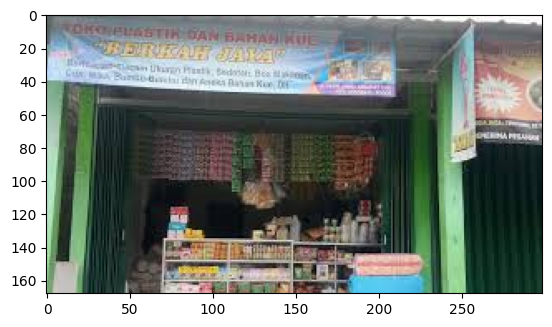

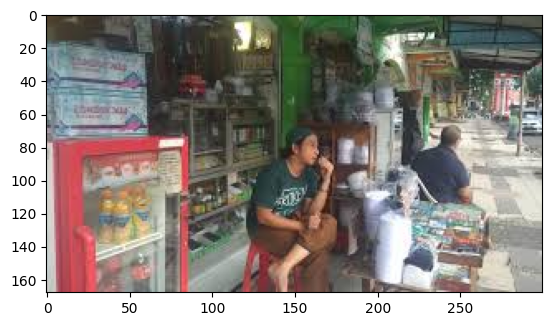

In [16]:
plt.imshow(load_img(os.path.join(data_dir, os.listdir(data_dir)[randint(0, len(os.listdir(data_dir)))])))
plt.show()
plt.imshow(load_img(os.path.join(data_dir, os.listdir(data_dir)[randint(0, len(os.listdir(data_dir)))])))
plt.show()